In [12]:
from soview import *
import pandas as pd
import datetime
import palettable
import squarify



In [2]:
cmp = palettable.cartocolors.qualitative.Bold_10.mpl_colors
cmp2 = palettable.cartocolors.qualitative.Safe_10.mpl_colors
cmp_omics = palettable.colorbrewer.qualitative.Set2_7.mpl_colors
cmp_omics = [cmp_omics[3],cmp_omics[4],cmp_omics[0],cmp_omics[1],cmp_omics[2]]
# trans_color = cmp_omics[2]
# prote_color = cmp_omics[3]

In [3]:
data = pd.read_excel('demo_data_0720.xlsx',sheet_name=0)
dataset = pd.read_excel('demo_data_0720.xlsx',sheet_name=1)
biotech = pd.read_excel('demo_data_0720.xlsx',sheet_name=2)

In [4]:
dataset = dataset.set_index('ID')

In [15]:
dataset.loc[92]['']

1

In [28]:
np.unique(dataset['Journal'])

array(['Cancer Research', 'Cell', 'Cell Genomics', 'Cell Metabolism',
       'Cell Reports', 'Communications Biology', 'Developmental Cell',
       'Laboratory Investigation', 'Nature',
       'Nature Biomedical Engineering', 'Nature Biotechnology',
       'Nature Cancer', 'Nature Communications', 'Nature Immunology',
       'Nature Methods', 'Nature Neuroscience', 'None', 'PNAS', 'Science',
       'Science Advances', 'Scientific Reports', 'elife'], dtype=object)

In [43]:
data

,ID,Name,Biotech_ID,Dataset_ID,H5ad_Path,GeneList_Path,Histology_Path,Species,Tissue,N_Unit,N_Gene,Zip_Path,with_control,with_replicate,with_annotation,with_publication,biotech_name,biotech_type
0,0,GSM4202309_0719aL_protein,22,76,demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...,demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...,None,Mouse,Embryo,2500,22,NaN,0,1,0,1,DBiT-seq,Spatial MultiOmics
1,1,GSM4202310_0725e10aL_protein,22,76,demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...,demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...,None,Mouse,Embryo,936,22,NaN,0,1,0,1,DBiT-seq,Spatial MultiOmics
2,2,E11_lower_body,22,76,demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...,demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...,None,Mouse,Embryo,1662,21890,NaN,0,1,0,1,DBiT-seq,Spatial MultiOmics
3,3,E10_whole_gene_best,22,76,demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...,demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...,None,Mouse,Embryo,936,22802,NaN,0,1,0,1,DBiT-seq,Spatial MultiOmics
4,4,E10_eye_and_nearby,22,76,demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...,demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...,None,Mouse,Embryo,2500,22969,NaN,0,1,0,1,DBiT-seq,Spatial MultiOmics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2179,2179,H20.30.001.STG.250.unexpand.rep1,3,92,demo_data/Spatial_Transcriptomics/MERFISH/Fang...,demo_data/Spatial_Transcriptomics/MERFISH/Fang...,None,Human,cortex,14174,250,NaN,1,1,0,1,MERFISH,Spatial Transcriptomics
2180,2180,H22.26.401.MTG.4000.expand.rep2,3,92,demo_data/Spatial_Transcriptomics/MERFISH/Fang...,demo_data/Spatial_Transcriptomics/MERFISH/Fang...,None,Human,cortex,3512,4000,NaN,1,1,0,1,MERFISH,Spatial Transcriptomics
2181,2181,H22.26.401.MTG.250.unexpand.rep1,3,92,demo_data/Spatial_Transcriptomics/MERFISH/Fang...,demo_data/Spatial_Transcriptomics/MERFISH/Fang...,None,Human,cortex,5891,250,NaN,1,1,0,1,MERFISH,Spatial Transcriptomics
2182,2182,mouse1.AUD_TEA_VIS.242.unexpand,3,92,demo_data/Spatial_Transcriptomics/MERFISH/Fang...,demo_data/Spatial_Transcriptomics/MERFISH/Fang...,None,Mouse,cortex,13222,242,NaN,1,1,0,1,MERFISH,Spatial Transcriptomics


In [45]:
with_control_list = []
with_replicate_list = []
with_annotation_list = []
with_publication_list = []
with_SEgene_annotation_list = []
for i in range(len(data)):
    cur_dataset_id = data.iloc[i]['Dataset_ID']
    dataset_info = dataset.loc[cur_dataset_id]
    with_control_list.append(dataset_info['with_control'])
    with_replicate_list.append(dataset_info['with_replicate'])    
    with_annotation_list.append(dataset_info['with_annotation'])    
    if dataset_info['Journal']=='None':
        with_publication_list.append(0)
    else:
        with_publication_list.append(1)
    with_SEgene = 1
    if dataset_info['Name_Short']=='Vickovic2019high' or dataset_info['Name_Short']=='cho2021microscopic':
        with_SEgene = 0
    if dataset_info['Name_Short']=='wang2021easi' and data.iloc[i]['Name']=='data':
        with_SEgene = 0
    if dataset_info['Name_Short']=='jiang2022spatial' and data.iloc[i]['Name']=='FP200000498TL_E5_stereoseq':
        with_SEgene = 0
    with_SEgene_annotation_list.append(with_SEgene)

In [44]:
dataset_info

Name_Short                                      Fang2022Conservation
Name_Long          Conservation and divergence of cortical cell o...
Biotech_ID                                                         3
doi                                     DOI: 10.1126/science.abm1741
Date                                             2022-06-30 00:00:00
Country                                                          USA
Journal                                                      Science
Author             Fang, Rongxin\nXia, Chenglong\nClose, Jennie L...
Access             https://datadryad.org/stash/dataset/doi:10.506...
Zip_Path                                                         NaN
with_control                                                       1
with_replicate                                                     1
with_annotation                                                    0
Name: 92, dtype: object

In [22]:
biotech = biotech[biotech.ID.notna()]
biotech[['ID']] = biotech[['ID']].astype('int')
biotech=biotech.set_index('ID')
biotech_name = [biotech.loc[i]['Name'] for i in data['Biotech_ID']]
biotech_type = [biotech.loc[i]['Type'] for i in data['Biotech_ID']]

In [46]:
data['with_control']=np.array(with_control_list)
data['with_replicate']=np.array(with_replicate_list)
data['with_annotation']=np.array(with_annotation_list)
data['with_publication']=np.array(with_publication_list)
data['biotech_name']=np.array(biotech_name)
data['biotech_type']=np.array(biotech_type)
data['with_SEgene_annotation'] = np.array(with_SEgene_annotation_list)

In [47]:
data

,ID,Name,Biotech_ID,Dataset_ID,H5ad_Path,GeneList_Path,Histology_Path,Species,Tissue,N_Unit,N_Gene,Zip_Path,with_control,with_replicate,with_annotation,with_publication,biotech_name,biotech_type,with_SEgene_annotation
0,0,GSM4202309_0719aL_protein,22,76,demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...,demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...,None,Mouse,Embryo,2500,22,NaN,0,1,0,1,DBiT-seq,Spatial MultiOmics,1
1,1,GSM4202310_0725e10aL_protein,22,76,demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...,demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...,None,Mouse,Embryo,936,22,NaN,0,1,0,1,DBiT-seq,Spatial MultiOmics,1
2,2,E11_lower_body,22,76,demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...,demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...,None,Mouse,Embryo,1662,21890,NaN,0,1,0,1,DBiT-seq,Spatial MultiOmics,1
3,3,E10_whole_gene_best,22,76,demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...,demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...,None,Mouse,Embryo,936,22802,NaN,0,1,0,1,DBiT-seq,Spatial MultiOmics,1
4,4,E10_eye_and_nearby,22,76,demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...,demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...,None,Mouse,Embryo,2500,22969,NaN,0,1,0,1,DBiT-seq,Spatial MultiOmics,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2179,2179,H20.30.001.STG.250.unexpand.rep1,3,92,demo_data/Spatial_Transcriptomics/MERFISH/Fang...,demo_data/Spatial_Transcriptomics/MERFISH/Fang...,None,Human,cortex,14174,250,NaN,1,1,0,1,MERFISH,Spatial Transcriptomics,1
2180,2180,H22.26.401.MTG.4000.expand.rep2,3,92,demo_data/Spatial_Transcriptomics/MERFISH/Fang...,demo_data/Spatial_Transcriptomics/MERFISH/Fang...,None,Human,cortex,3512,4000,NaN,1,1,0,1,MERFISH,Spatial Transcriptomics,1
2181,2181,H22.26.401.MTG.250.unexpand.rep1,3,92,demo_data/Spatial_Transcriptomics/MERFISH/Fang...,demo_data/Spatial_Transcriptomics/MERFISH/Fang...,None,Human,cortex,5891,250,NaN,1,1,0,1,MERFISH,Spatial Transcriptomics,1
2182,2182,mouse1.AUD_TEA_VIS.242.unexpand,3,92,demo_data/Spatial_Transcriptomics/MERFISH/Fang...,demo_data/Spatial_Transcriptomics/MERFISH/Fang...,None,Mouse,cortex,13222,242,NaN,1,1,0,1,MERFISH,Spatial Transcriptomics,1


In [49]:
np.unique(data['with_SEgene_annotation'],return_counts=1)

(array([0, 1]), array([   3, 2181]))

In [51]:
df = data.replace({np.nan: 'None'})

In [54]:
df['Species'] = df['Species'].str.upper()
df['Tissue'] = df['Tissue'].str.upper()

In [55]:
df

,ID,Name,Biotech_ID,Dataset_ID,H5ad_Path,GeneList_Path,Histology_Path,Species,Tissue,N_Unit,N_Gene,Zip_Path,with_control,with_replicate,with_annotation,with_publication,biotech_name,biotech_type,with_SEgene_annotation
0,0,GSM4202309_0719aL_protein,22,76,demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...,demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...,None,MOUSE,EMBRYO,2500,22,None,0,1,0,1,DBiT-seq,Spatial MultiOmics,1
1,1,GSM4202310_0725e10aL_protein,22,76,demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...,demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...,None,MOUSE,EMBRYO,936,22,None,0,1,0,1,DBiT-seq,Spatial MultiOmics,1
2,2,E11_lower_body,22,76,demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...,demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...,None,MOUSE,EMBRYO,1662,21890,None,0,1,0,1,DBiT-seq,Spatial MultiOmics,1
3,3,E10_whole_gene_best,22,76,demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...,demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...,None,MOUSE,EMBRYO,936,22802,None,0,1,0,1,DBiT-seq,Spatial MultiOmics,1
4,4,E10_eye_and_nearby,22,76,demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...,demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...,None,MOUSE,EMBRYO,2500,22969,None,0,1,0,1,DBiT-seq,Spatial MultiOmics,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2179,2179,H20.30.001.STG.250.unexpand.rep1,3,92,demo_data/Spatial_Transcriptomics/MERFISH/Fang...,demo_data/Spatial_Transcriptomics/MERFISH/Fang...,None,HUMAN,CORTEX,14174,250,None,1,1,0,1,MERFISH,Spatial Transcriptomics,1
2180,2180,H22.26.401.MTG.4000.expand.rep2,3,92,demo_data/Spatial_Transcriptomics/MERFISH/Fang...,demo_data/Spatial_Transcriptomics/MERFISH/Fang...,None,HUMAN,CORTEX,3512,4000,None,1,1,0,1,MERFISH,Spatial Transcriptomics,1
2181,2181,H22.26.401.MTG.250.unexpand.rep1,3,92,demo_data/Spatial_Transcriptomics/MERFISH/Fang...,demo_data/Spatial_Transcriptomics/MERFISH/Fang...,None,HUMAN,CORTEX,5891,250,None,1,1,0,1,MERFISH,Spatial Transcriptomics,1
2182,2182,mouse1.AUD_TEA_VIS.242.unexpand,3,92,demo_data/Spatial_Transcriptomics/MERFISH/Fang...,demo_data/Spatial_Transcriptomics/MERFISH/Fang...,None,MOUSE,CORTEX,13222,242,None,1,1,0,1,MERFISH,Spatial Transcriptomics,1


In [56]:
df = df.astype(str)

In [58]:
df.to_feather('data.feather')

In [5]:
df = pd.read_feather('data.feather')

In [60]:
df

,ID,Name,Biotech_ID,Dataset_ID,H5ad_Path,GeneList_Path,Histology_Path,Species,Tissue,N_Unit,N_Gene,Zip_Path,with_control,with_replicate,with_annotation,with_publication,biotech_name,biotech_type,with_SEgene_annotation
0,0,GSM4202309_0719aL_protein,22,76,demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...,demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...,None,MOUSE,EMBRYO,2500,22,None,0,1,0,1,DBiT-seq,Spatial MultiOmics,1
1,1,GSM4202310_0725e10aL_protein,22,76,demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...,demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...,None,MOUSE,EMBRYO,936,22,None,0,1,0,1,DBiT-seq,Spatial MultiOmics,1
2,2,E11_lower_body,22,76,demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...,demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...,None,MOUSE,EMBRYO,1662,21890,None,0,1,0,1,DBiT-seq,Spatial MultiOmics,1
3,3,E10_whole_gene_best,22,76,demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...,demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...,None,MOUSE,EMBRYO,936,22802,None,0,1,0,1,DBiT-seq,Spatial MultiOmics,1
4,4,E10_eye_and_nearby,22,76,demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...,demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...,None,MOUSE,EMBRYO,2500,22969,None,0,1,0,1,DBiT-seq,Spatial MultiOmics,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2179,2179,H20.30.001.STG.250.unexpand.rep1,3,92,demo_data/Spatial_Transcriptomics/MERFISH/Fang...,demo_data/Spatial_Transcriptomics/MERFISH/Fang...,None,HUMAN,CORTEX,14174,250,None,1,1,0,1,MERFISH,Spatial Transcriptomics,1
2180,2180,H22.26.401.MTG.4000.expand.rep2,3,92,demo_data/Spatial_Transcriptomics/MERFISH/Fang...,demo_data/Spatial_Transcriptomics/MERFISH/Fang...,None,HUMAN,CORTEX,3512,4000,None,1,1,0,1,MERFISH,Spatial Transcriptomics,1
2181,2181,H22.26.401.MTG.250.unexpand.rep1,3,92,demo_data/Spatial_Transcriptomics/MERFISH/Fang...,demo_data/Spatial_Transcriptomics/MERFISH/Fang...,None,HUMAN,CORTEX,5891,250,None,1,1,0,1,MERFISH,Spatial Transcriptomics,1
2182,2182,mouse1.AUD_TEA_VIS.242.unexpand,3,92,demo_data/Spatial_Transcriptomics/MERFISH/Fang...,demo_data/Spatial_Transcriptomics/MERFISH/Fang...,None,MOUSE,CORTEX,13222,242,None,1,1,0,1,MERFISH,Spatial Transcriptomics,1


In [62]:
import squarify

# these values define the coordinate system for the returned rectangles
# the values will range from x to x + width and y to y + height
x = 0.
y = 0.
width = 700.
height = 433.

values = [500, 433, 78, 25, 25, 7]

# values must be sorted descending (and positive, obviously)
values.sort(reverse=True)

# the sum of the values must equal the total area to be laid out
# i.e., sum(values) == width * height
values = squarify.normalize_sizes(values, width, height)

# returns a list of rectangles
rects = squarify.squarify(values, x, y, width, height)

# padded rectangles will probably visualize better for certain cases
padded_rects = squarify.padded_squarify(values, x, y, width, height)

In [63]:
padded_rects

[{'x': 1.0, 'y': 1.0, 'dx': 325.7153558052434, 'dy': 431.0},
 {'x': 328.7153558052434,
  'y': 1.0,
  'dx': 370.2846441947566,
  'dy': 328.0862676056338},
 {'x': 328.7153558052434,
  'y': 331.0862676056338,
  'dx': 213.0977944236371,
  'dy': 100.9137323943662},
 {'x': 543.8131502288805,
  'y': 331.0862676056338,
  'dx': 66.94160077680677,
  'dy': 100.9137323943662},
 {'x': 612.7547510056874,
  'y': 331.0862676056338,
  'dx': 86.24524899431273,
  'dy': 78.40135343309854},
 {'x': 612.7547510056874,
  'y': 411.4876210387323,
  'dx': 86.2452489943124,
  'dy': 20.51237896126767}]

In [67]:
df

,ID,Name,Biotech_ID,Dataset_ID,H5ad_Path,GeneList_Path,Histology_Path,Species,Tissue,N_Unit,N_Gene,Zip_Path,with_control,with_replicate,with_annotation,with_publication,biotech_name,biotech_type,with_SEgene_annotation
0,0,GSM4202309_0719aL_protein,22,76,demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...,demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...,None,MOUSE,EMBRYO,2500,22,None,0,1,0,1,DBiT-seq,Spatial MultiOmics,1
1,1,GSM4202310_0725e10aL_protein,22,76,demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...,demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...,None,MOUSE,EMBRYO,936,22,None,0,1,0,1,DBiT-seq,Spatial MultiOmics,1
2,2,E11_lower_body,22,76,demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...,demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...,None,MOUSE,EMBRYO,1662,21890,None,0,1,0,1,DBiT-seq,Spatial MultiOmics,1
3,3,E10_whole_gene_best,22,76,demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...,demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...,None,MOUSE,EMBRYO,936,22802,None,0,1,0,1,DBiT-seq,Spatial MultiOmics,1
4,4,E10_eye_and_nearby,22,76,demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...,demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...,None,MOUSE,EMBRYO,2500,22969,None,0,1,0,1,DBiT-seq,Spatial MultiOmics,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2179,2179,H20.30.001.STG.250.unexpand.rep1,3,92,demo_data/Spatial_Transcriptomics/MERFISH/Fang...,demo_data/Spatial_Transcriptomics/MERFISH/Fang...,None,HUMAN,CORTEX,14174,250,None,1,1,0,1,MERFISH,Spatial Transcriptomics,1
2180,2180,H22.26.401.MTG.4000.expand.rep2,3,92,demo_data/Spatial_Transcriptomics/MERFISH/Fang...,demo_data/Spatial_Transcriptomics/MERFISH/Fang...,None,HUMAN,CORTEX,3512,4000,None,1,1,0,1,MERFISH,Spatial Transcriptomics,1
2181,2181,H22.26.401.MTG.250.unexpand.rep1,3,92,demo_data/Spatial_Transcriptomics/MERFISH/Fang...,demo_data/Spatial_Transcriptomics/MERFISH/Fang...,None,HUMAN,CORTEX,5891,250,None,1,1,0,1,MERFISH,Spatial Transcriptomics,1
2182,2182,mouse1.AUD_TEA_VIS.242.unexpand,3,92,demo_data/Spatial_Transcriptomics/MERFISH/Fang...,demo_data/Spatial_Transcriptomics/MERFISH/Fang...,None,MOUSE,CORTEX,13222,242,None,1,1,0,1,MERFISH,Spatial Transcriptomics,1


# plot treemap

## human

In [26]:
df_human = df[df.Species=='HUMAN']

In [27]:
# df_trans = df_human[df_human.biotech_type=='Spatial Transcriptomics']

In [28]:
df_human = df_human.groupby('biotech_name').agg('count')

In [29]:
treemap_label = list(df_human.index)
treemap_count = list(df_human['ID'])

In [30]:
treemap_count_sqrt = [np.sqrt(i) for i in treemap_count]

<AxesSubplot:>

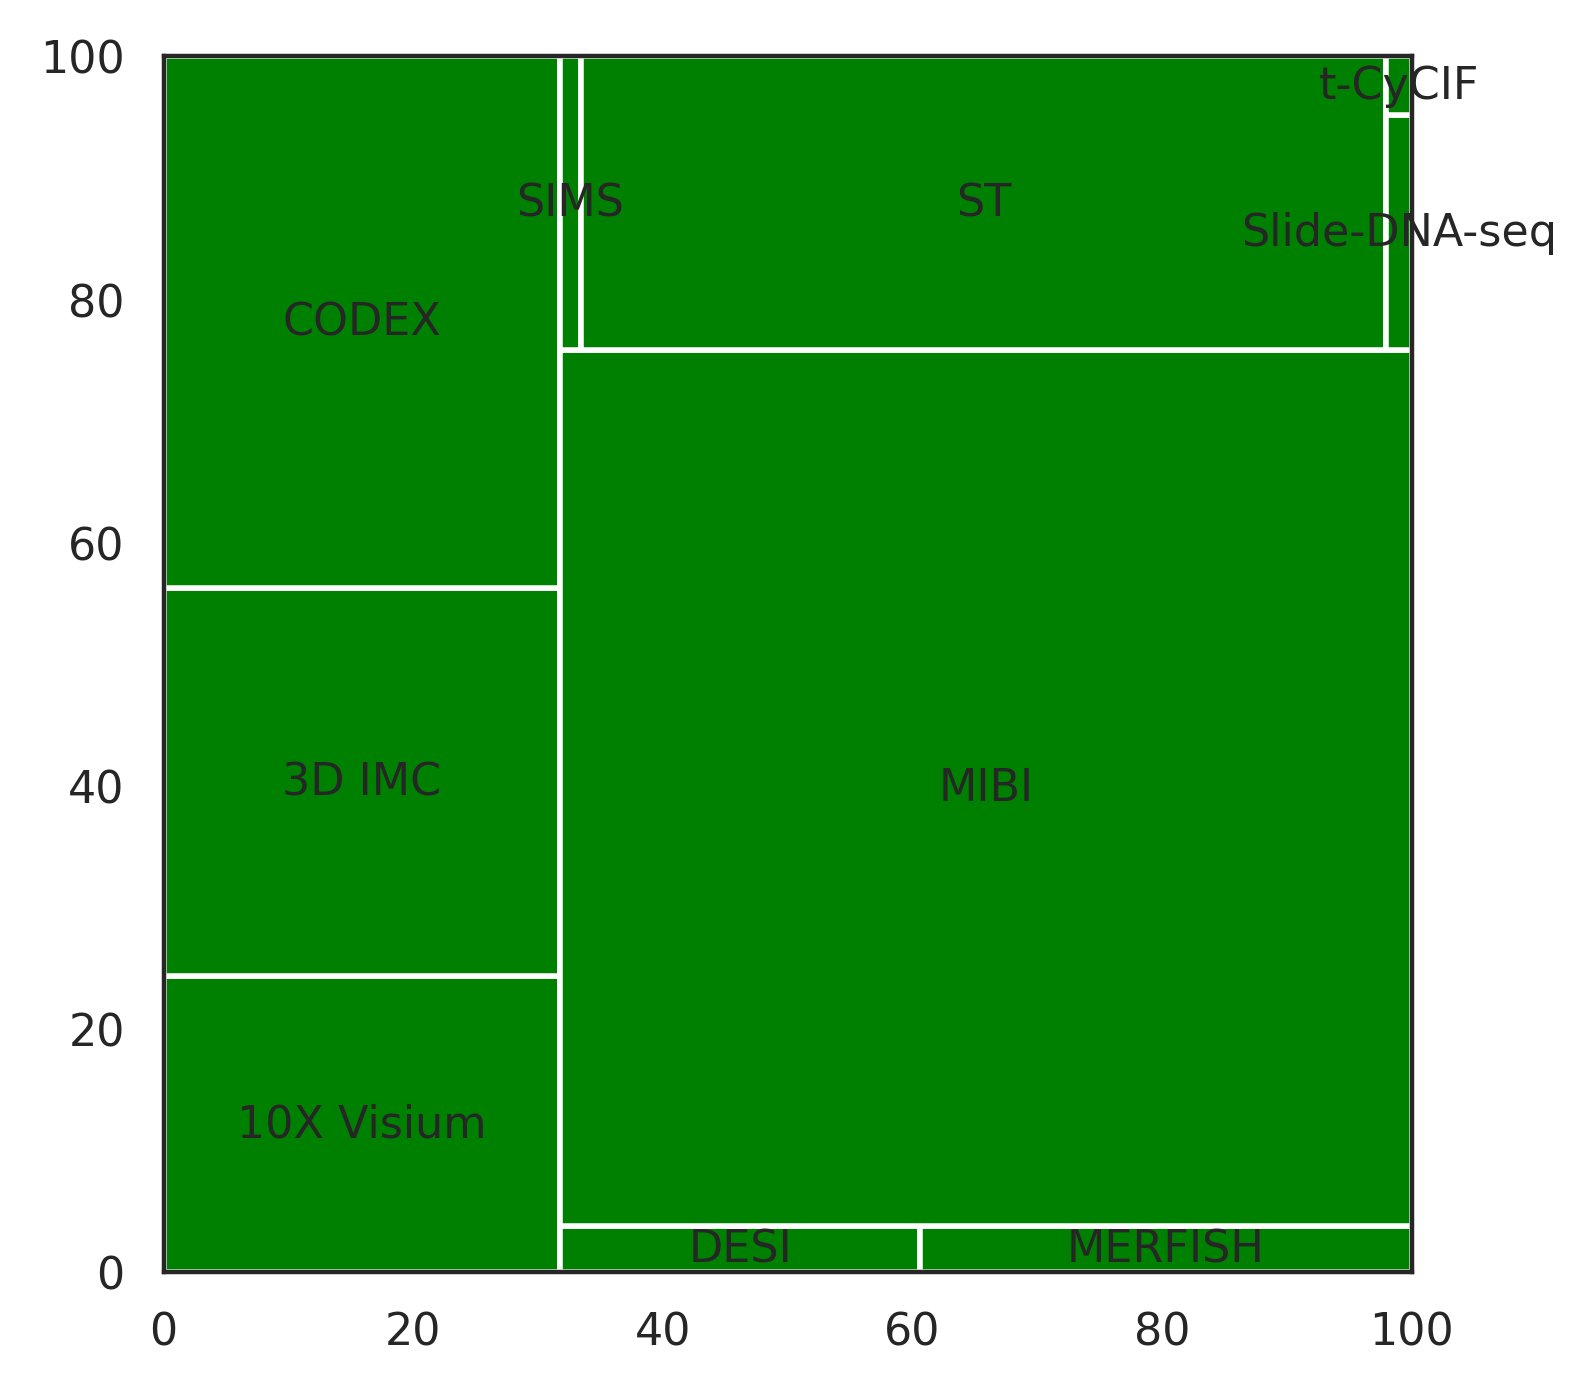

In [13]:
squarify.plot(sizes=treemap_count,label=treemap_label,color='green')

In [109]:
treemap_label

['10X Visium',
 '3D IMC',
 'CODEX',
 'DESI',
 'MERFISH',
 'MIBI',
 'SIMS',
 'ST',
 'Slide-DNA-seq',
 't-CyCIF']

In [31]:
treemap_label_edit = treemap_label.copy()
treemap_label_edit[6] = ''
treemap_label_edit[8] = ''
treemap_label_edit[9] = ''

In [32]:
color_list = [cmp_omics[0],cmp_omics[1],cmp_omics[1],cmp_omics[2],cmp_omics[0],cmp_omics[1],cmp_omics[2],cmp_omics[0],cmp_omics[3],cmp_omics[1]]

<AxesSubplot:>

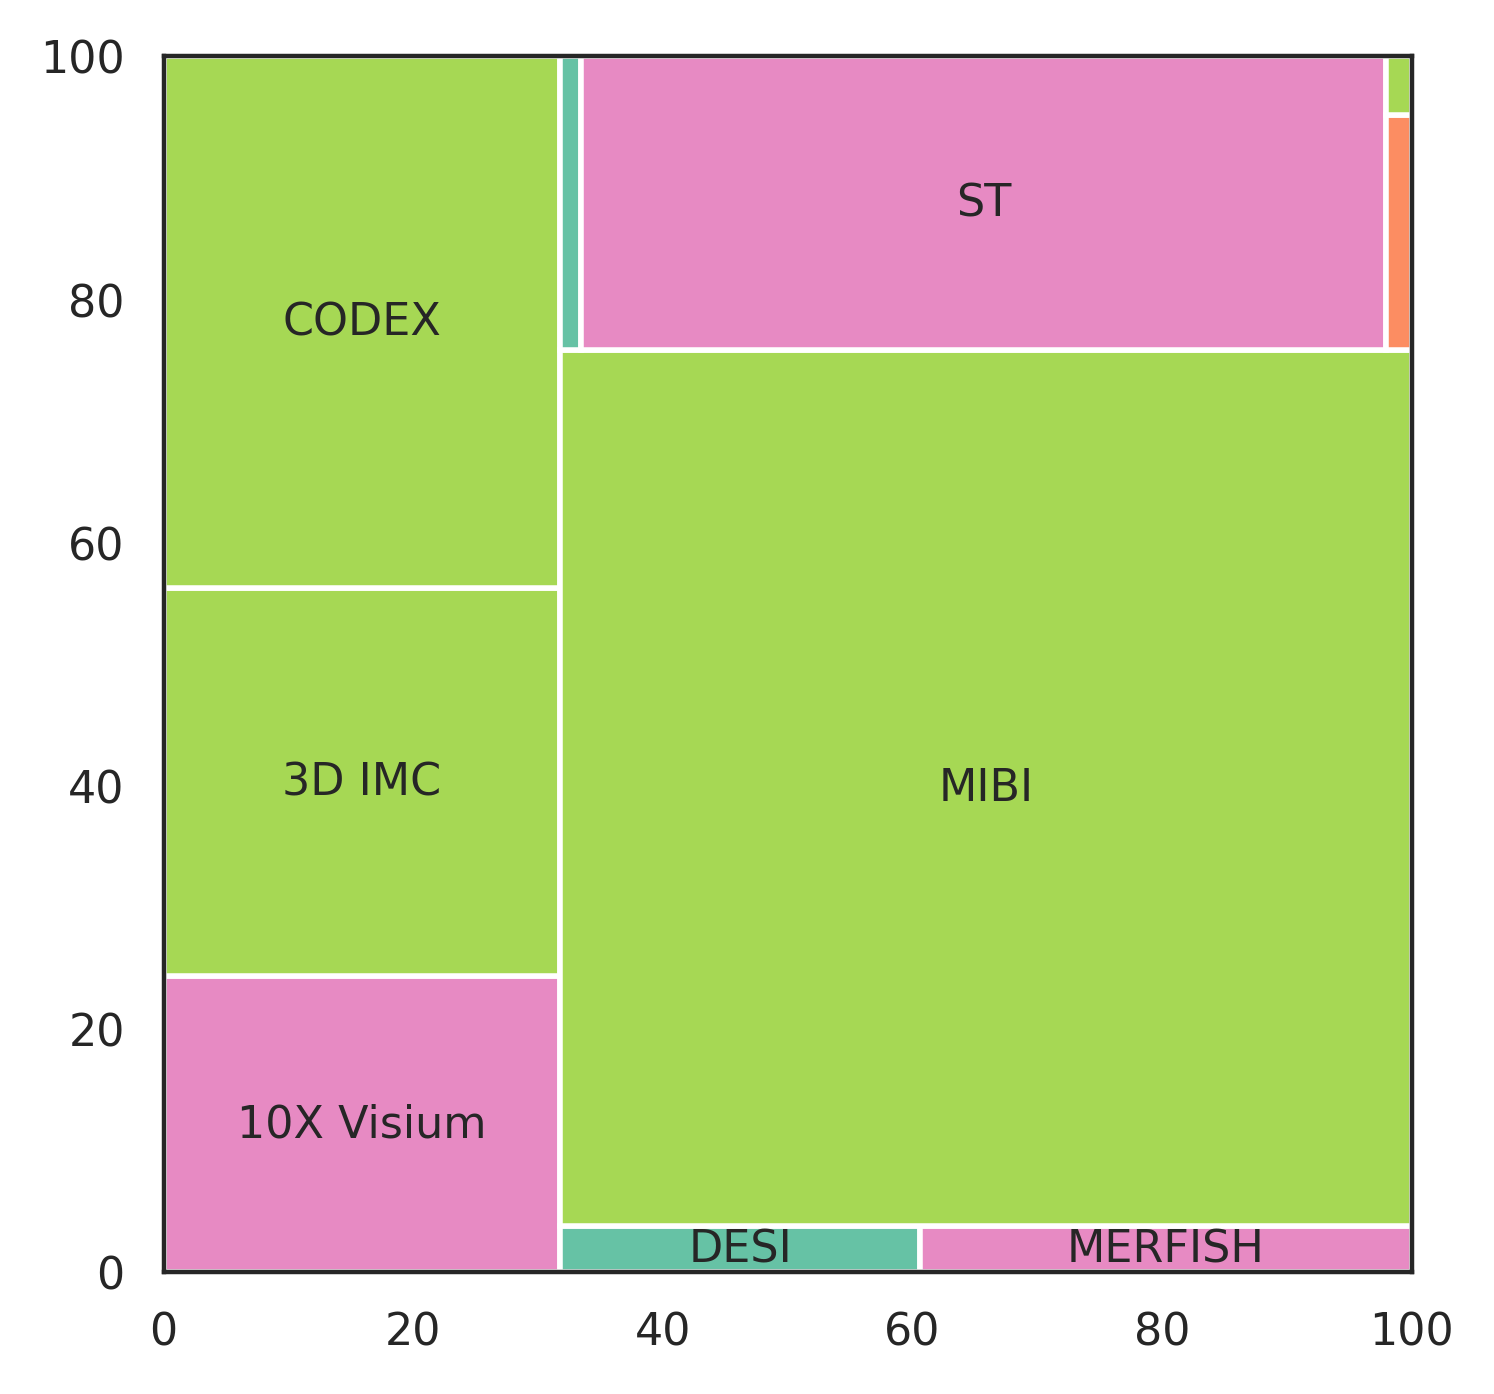

In [113]:
squarify.plot(sizes=treemap_count,label=treemap_label_edit,color=color_list)

<AxesSubplot:>

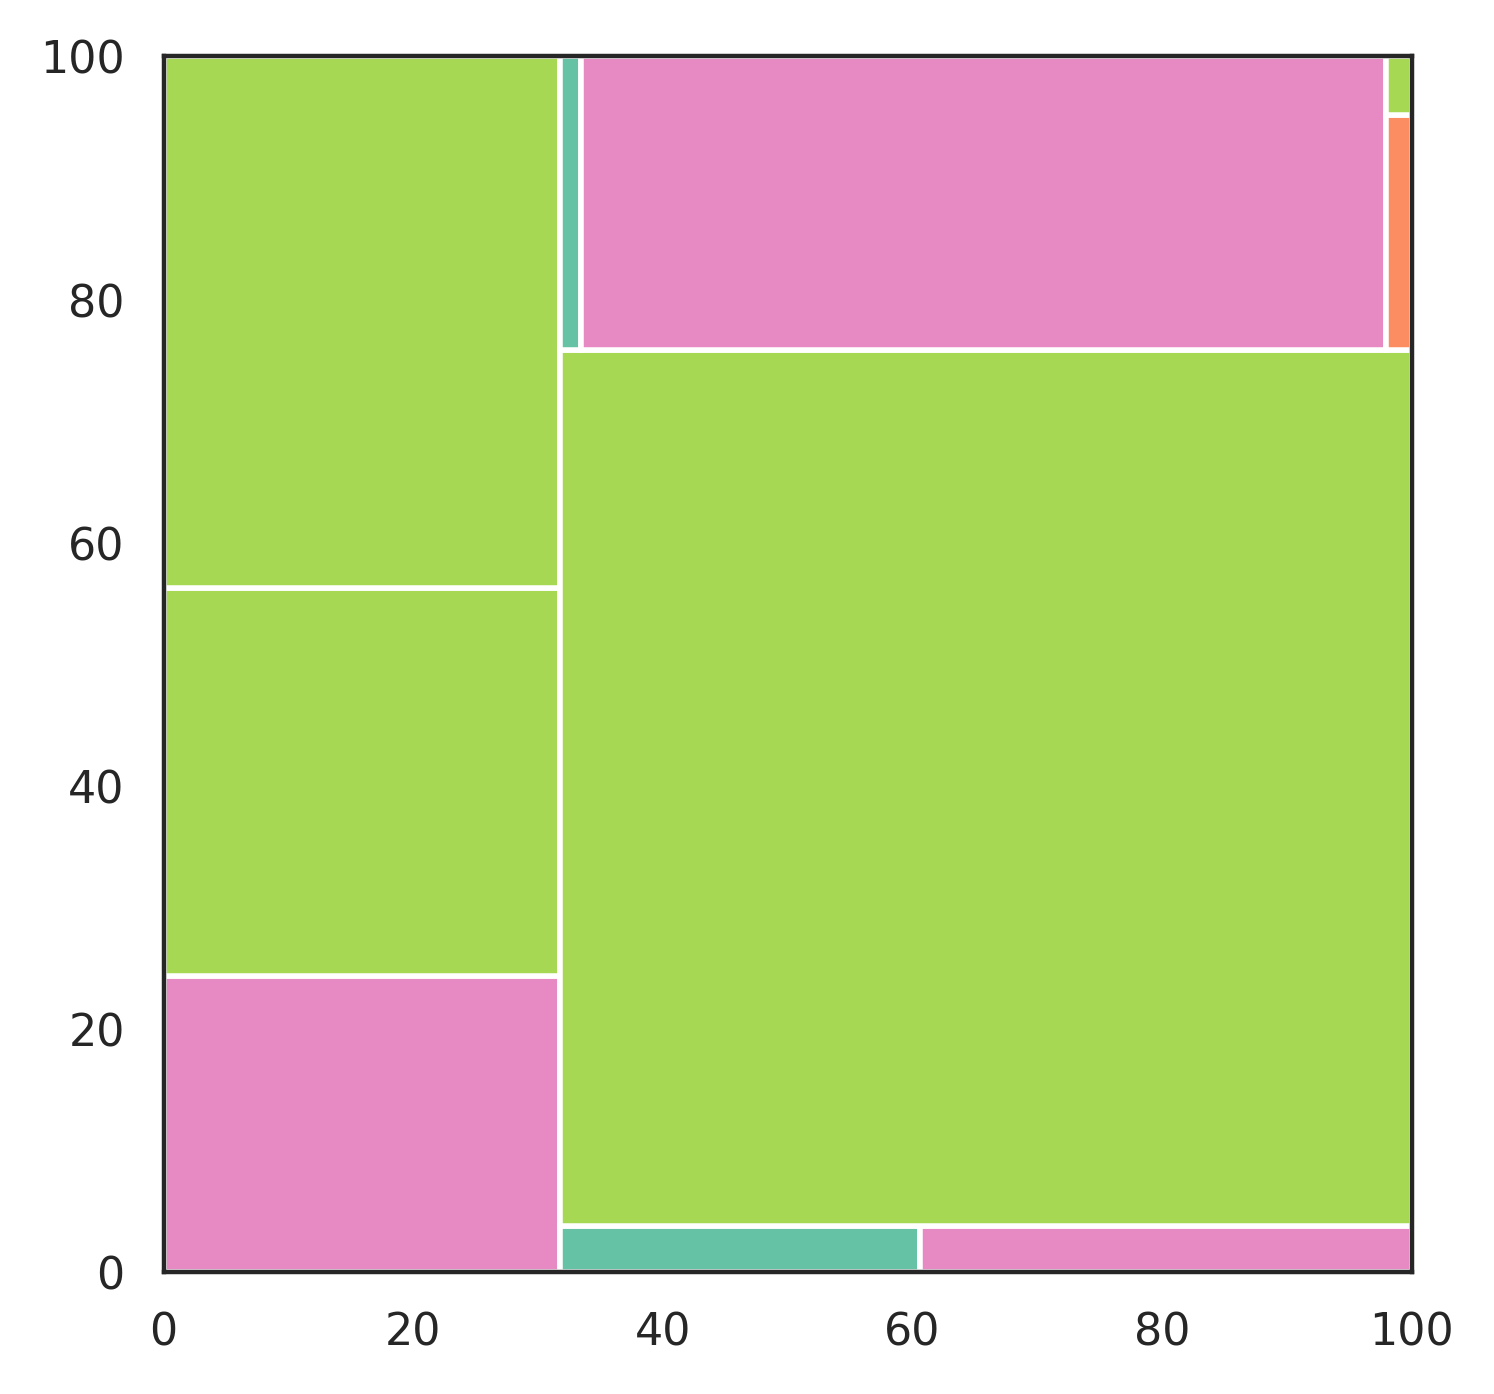

In [33]:
squarify.plot(sizes=treemap_count,color=color_list)

## mouse

In [14]:
df_mouse = df[df.Species=='MOUSE']

In [15]:
# df_trans = df_human[df_human.biotech_type=='Spatial Transcriptomics']

In [16]:
df_mouse = df_mouse.groupby('biotech_name').agg('count')

In [17]:
treemap_label = list(df_mouse.index)
treemap_count = list(df_mouse['ID'])

In [18]:
treemap_count_sqrt = [np.sqrt(i) for i in treemap_count]

<AxesSubplot:>

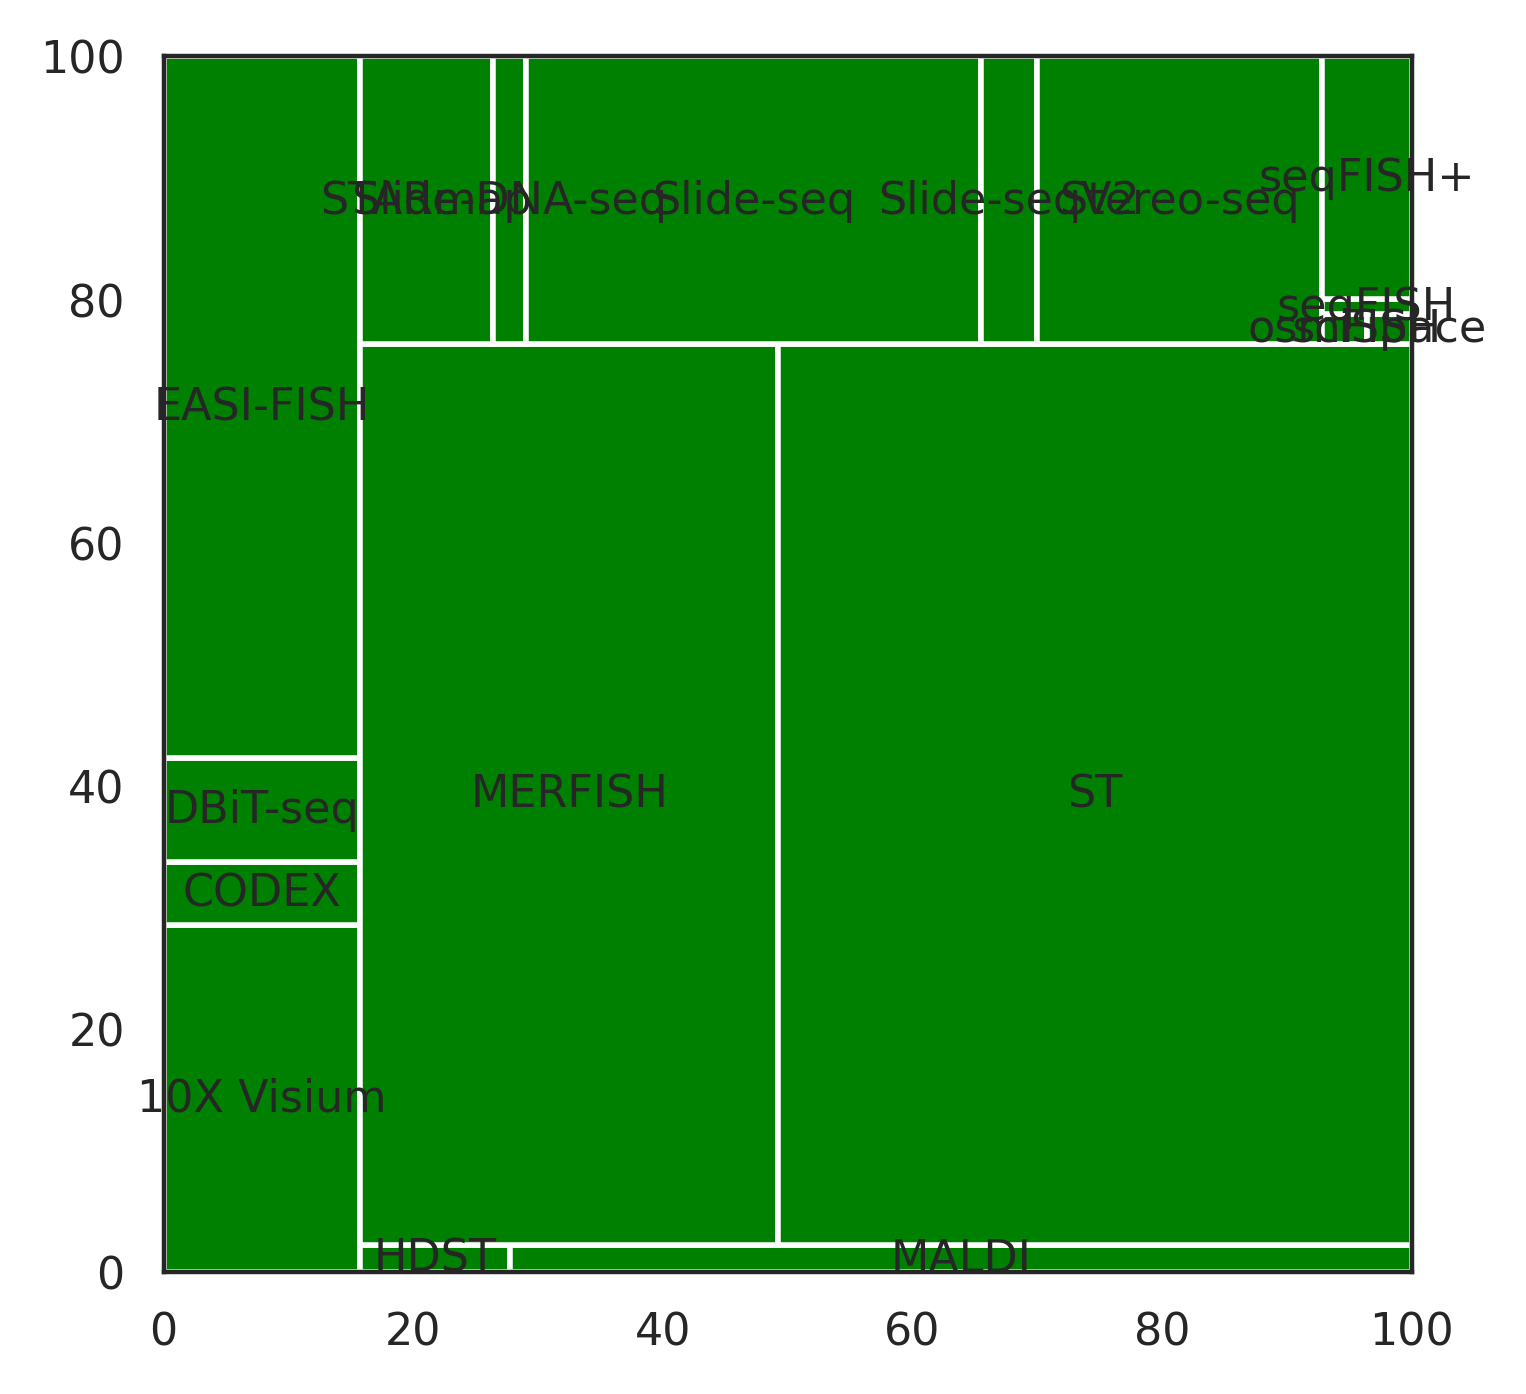

In [118]:
squarify.plot(sizes=treemap_count,label=treemap_label,color='green')

In [123]:
treemap_label

['10X Visium',
 'CODEX',
 'DBiT-seq',
 'EASI-FISH',
 'HDST',
 'MALDI',
 'MERFISH',
 'ST',
 'STARmap',
 'Slide-DNA-seq',
 'Slide-seq',
 'Slide-seqV2',
 'Stereo-seq',
 'osmFISH',
 'sciSpace',
 'seqFISH',
 'seqFISH+']

In [19]:
treemap_label_edit = treemap_label.copy()
treemap_label_edit[4] = ''
treemap_label_edit[5] = ''
treemap_label_edit[8] = ''
treemap_label_edit[9] = ''
treemap_label_edit[11] = ''


treemap_label_edit[13] = ''
treemap_label_edit[14] = ''
treemap_label_edit[15] = ''
treemap_label_edit[16] = ''

In [20]:
color_list = [cmp_omics[0],cmp_omics[1],cmp_omics[4],cmp_omics[0],cmp_omics[0],cmp_omics[2],cmp_omics[0],cmp_omics[0],cmp_omics[0],cmp_omics[3],
             cmp_omics[0],cmp_omics[0],cmp_omics[0],cmp_omics[0],cmp_omics[0],cmp_omics[0],cmp_omics[0]
             ]

<AxesSubplot:>

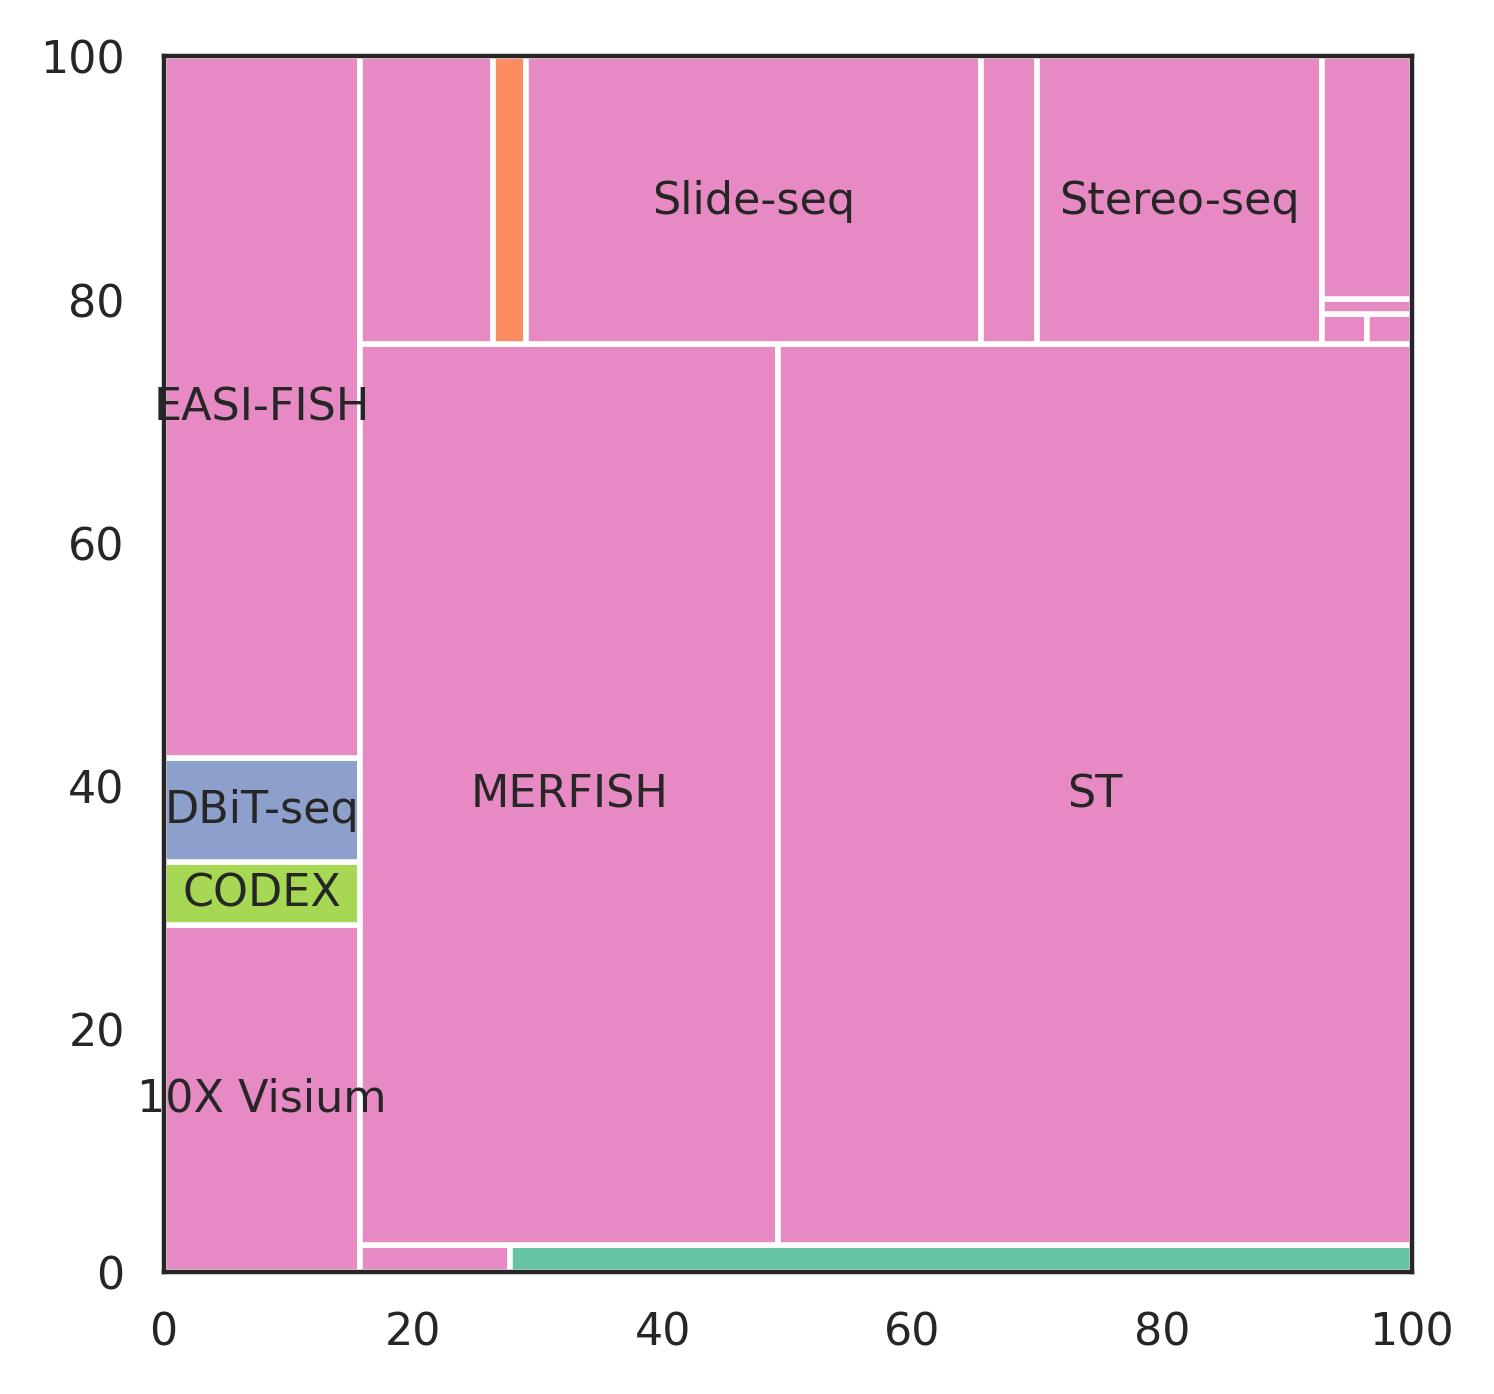

In [21]:
squarify.plot(sizes=treemap_count,label=treemap_label_edit,color=color_list)

<AxesSubplot:>

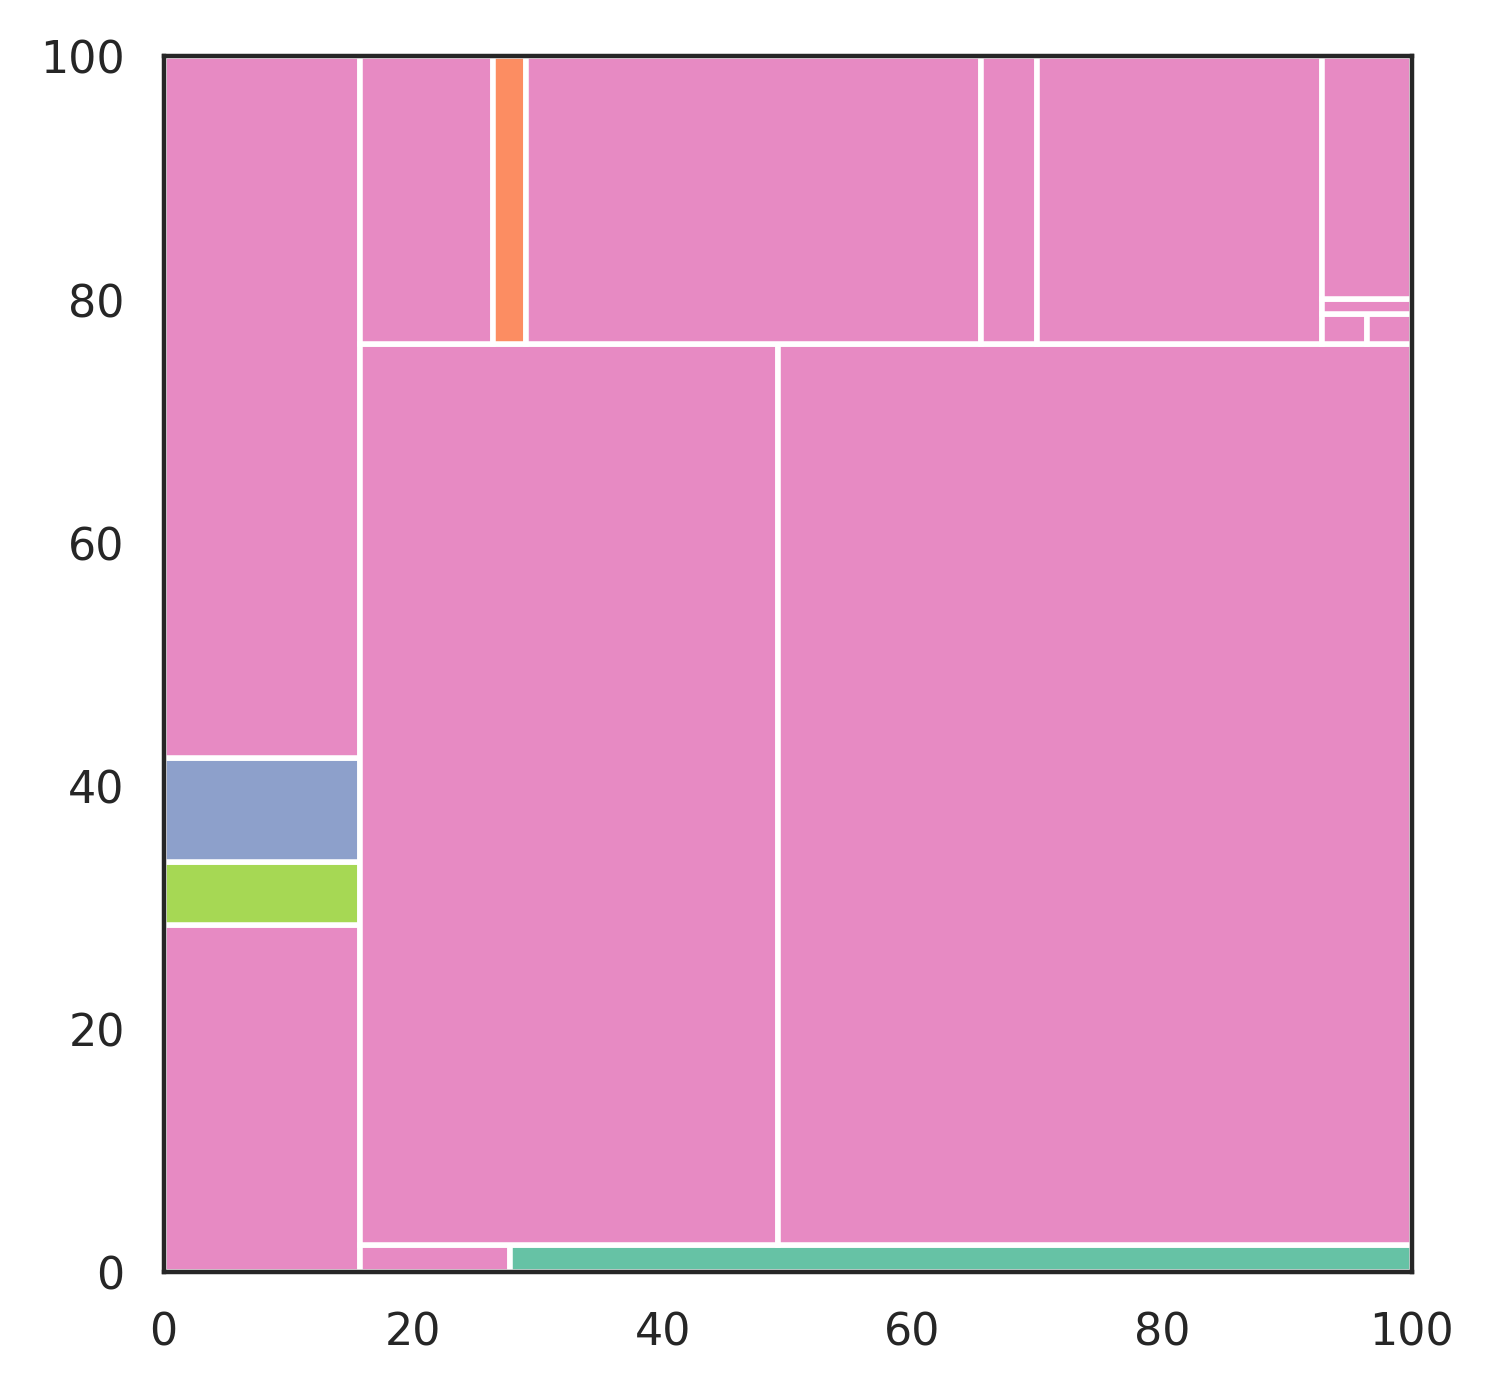

In [23]:
squarify.plot(sizes=treemap_count,color=color_list)